<a href="https://colab.research.google.com/github/shreya-09/Python/blob/master/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   y = mx + b


y = result
m = coef
b = intercept




# Single variable - That is 2 attributes in the model

### Home Prices

In [49]:
# importing the libraries
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [50]:
# importing the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
# reading dataset into dataframe - df
df = pd.read_excel('/content/drive/MyDrive/AI/Python/homePrices_1.xlsx')
df

,Area,Price
0,2600,45000
1,3200,70000
2,2300,10000
3,7000,200000
4,4500,50000


Plotting a scatter plot - using MatplotLib
naming the x and y axis

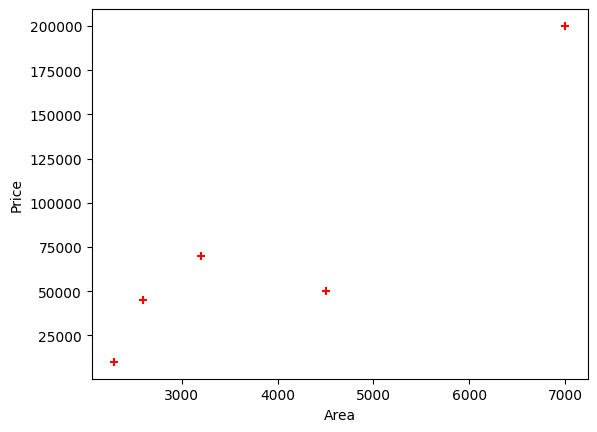

In [28]:
%matplotlib inline
plt.xlabel('Area')
plt.ylabel('Price')
plt.scatter(df.Area,df.Price,color='red',marker='+')

creating a data frame that consistes only area

In [30]:
new_df = df.drop('Price',axis='columns')
new_df

,Area
0,2600
1,3200
2,2300
3,7000
4,4500


dataframe that only containes price

In [32]:
price_df = df.Price
price_df

,Price
0,45000
1,70000
2,10000
3,200000
4,50000


calling the model
2 atributes - area and price

In [33]:
reg = linear_model.LinearRegression()
reg.fit(new_df,price_df)

LinearRegression()

In [34]:
reg.predict([[3300]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53122.1104161])

In [37]:
reg.intercept_

-63324.72124014137

In [36]:
reg.coef_

array([35.28691868])

In [38]:
reg.predict([[5005]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([113286.30677182])

new data set - that only contains the area - df_area

In [39]:
df_area = pd.read_excel('/content/drive/MyDrive/AI/Python/area.xlsx')
df_area

,Area,Price
0,2500,NaN
1,3000,NaN
2,5500,NaN


the value of price in df_area = predicted by reg model taking area atr

In [46]:
# Assuming 'Area' is the feature used during training
df_area['Price'] = reg.predict(df_area[['Area']])
df_area

,Area,Price
0,2500,24892.575469
1,3000,42536.034811
2,5500,130753.331520


### Per capita income

In [60]:
# importing the libraries
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
df_income = pd.read_excel('/content/drive/MyDrive/AI/Python/per_capita_income.xlsx')
df_income.head(5)

,Year,Income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [63]:
df_per_capita = df_income.drop('Year',axis='columns')
df_per_capita.head(5)

,Income
0,3399.299037
1,3768.297935
2,4251.175484
3,4804.463248
4,5576.514583


In [66]:
df_year = df_income.Year
df_year.head(5)

,Year
0,1970
1,1971
2,1972
3,1973
4,1974


In [67]:
income_reg = linear_model.LinearRegression()
income_reg.fit(df_per_capita,df_year)

LinearRegression()

In [68]:
reg.predict([[2020]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([7954.85450095])

# Multi variable - more than 2 atributes in model

In [69]:
# reading dataset into dataframe - df
df2 = pd.read_csv('/content/drive/MyDrive/AI/Python/homeprices.csv')
df2

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [70]:
df2.bedrooms.median()

4.0

In [72]:
df2.bedrooms = df2.bedrooms.fillna(df2.bedrooms.median())
df2

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [79]:
reg2 = linear_model.LinearRegression()
reg2.fit(df2.drop('price',axis='columns'),df2.price)

LinearRegression()

In [80]:
reg2.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [81]:
reg2.predict([[3000, 3, 40]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])

next question


In [82]:
# reading dataset into dataframe - df
df3 = pd.read_csv('/content/drive/MyDrive/AI/Python/hiring.csv')
df3

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [98]:
df3.experience = df3.experience.fillna(0)
df3

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [92]:
df3['test_score(out of 10)'] = df3['test_score(out of 10)'].fillna(df3['test_score(out of 10)'].median())
df3

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000
